# Processes and Threads
Process is an instance of a program. In simpler terms, whenever you run a python script, one main process is launched. That process might contain several threads which can access data held with the process.

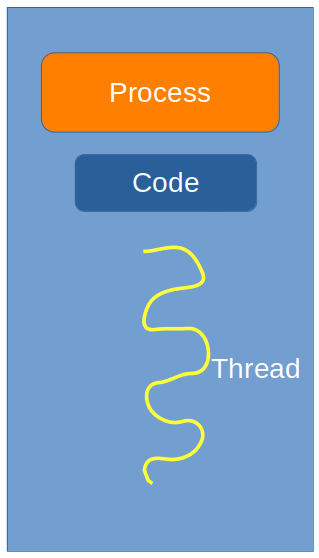

# MultiThreading
As these processes have multiple threads, it is obvious to think about taking advantage of those threads.Thus comes multithreading into picture. As the name suggests, we will use multiple threads to run a script and reduce execution time. The Multithreading operatins are handled by CPython Interpreter.

Let us see the main thread in python:

In [40]:
import time

if __name__ == "__main__":
    time.sleep(2)

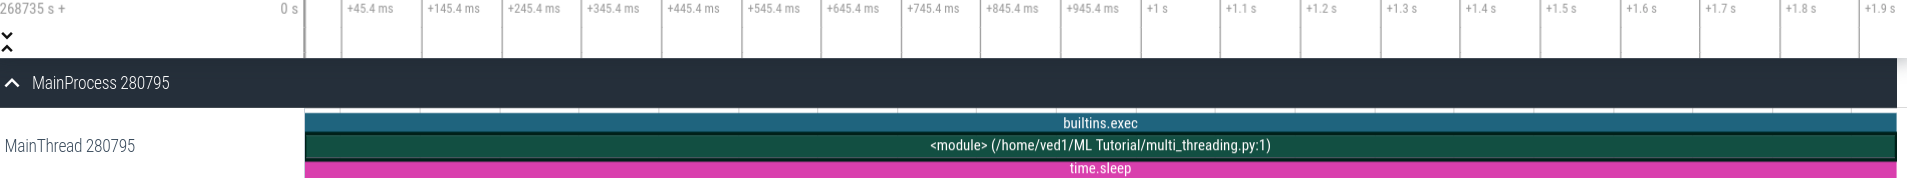

Thread swithcing takes place in cores. If one thread is waiting for something, the core switches to another thread and executes that to reduce the downtime. This is known as Concurrency.

Example: Consider you are playing a game and connected to a server. One thread might be connected to the server and requests some data from it. The server might take some time to respond and thus comes the waiting time into picture. But we don't want our game to freeze. We can assign a thread that handles the graphics display. So until the thread is waiting for some message from the server, the core can switch to the graphics thread.

In [5]:
from threading import *
import time

def print_A():
    print('A')
    time.sleep(1)
    print('C')

def print_B():
    print('B')
    

if __name__ == "__main__":

    # Initialize thread
    thread_1 = Thread(target=print_A)
    thread_2 = Thread(target=print_B)

    # Start Thread
    thread_1.start()
    thread_2.start()
    
    # Join Thread
    thread_1.join()
    thread_2.join()

A
B
C


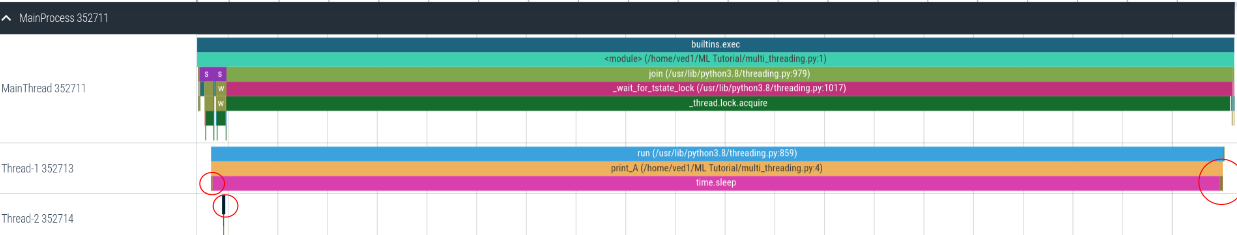

Let us begin with initialising the threads. The threads can be imported from the module "threading". To start the thread, use start function. As seen below, the threads will start but the main thread will finish before these threads.

In [33]:
from threading import *
import time

def print_A():
    for i in range(3):
        print('A')
        time.sleep(0.01)


def print_B():
    for i in range(3):
        print('B')
        time.sleep(0.01)


if __name__ == "__main__":
    start = time.perf_counter()
    
    # Initialize thread
    thread_1 = Thread(target=print_A)
    thread_2 = Thread(target=print_B)

    # Start Thread
    thread_1.start()
    thread_2.start()
    
    end = time.perf_counter()
    
    print('Execution Time: ', end-start)

A
B
Execution Time:  0.008165000000190048
BA

BA



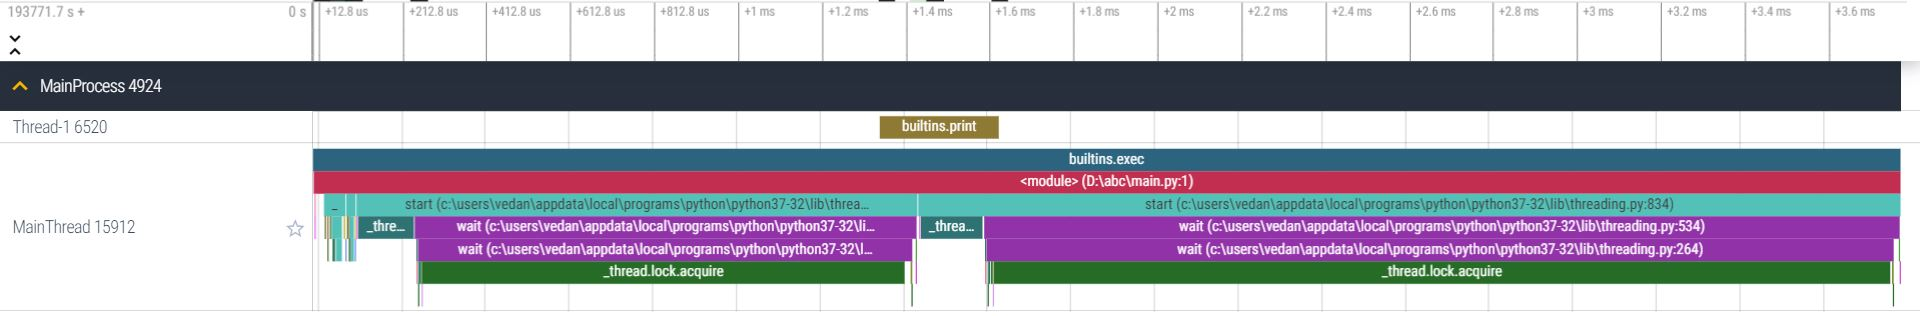

In [34]:
from threading import *
import time

def print_A():
    for i in range(3):
        print('A')
        time.sleep(0.01)


def print_B():
    for i in range(3):
        print('B')
        time.sleep(0.01)


if __name__ == "__main__":
    start = time.perf_counter()

    # Initialize thread
    thread_1 = Thread(target=print_A)
    thread_2 = Thread(target=print_B)

    # Start Thread
    thread_1.start()
    thread_2.start()

    thread_1.join()
    thread_2.join
    
    end = time.perf_counter()
    
    print('Execution Time: ', end-start)

A
B
BA

BA

Execution Time:  0.054290999999466294


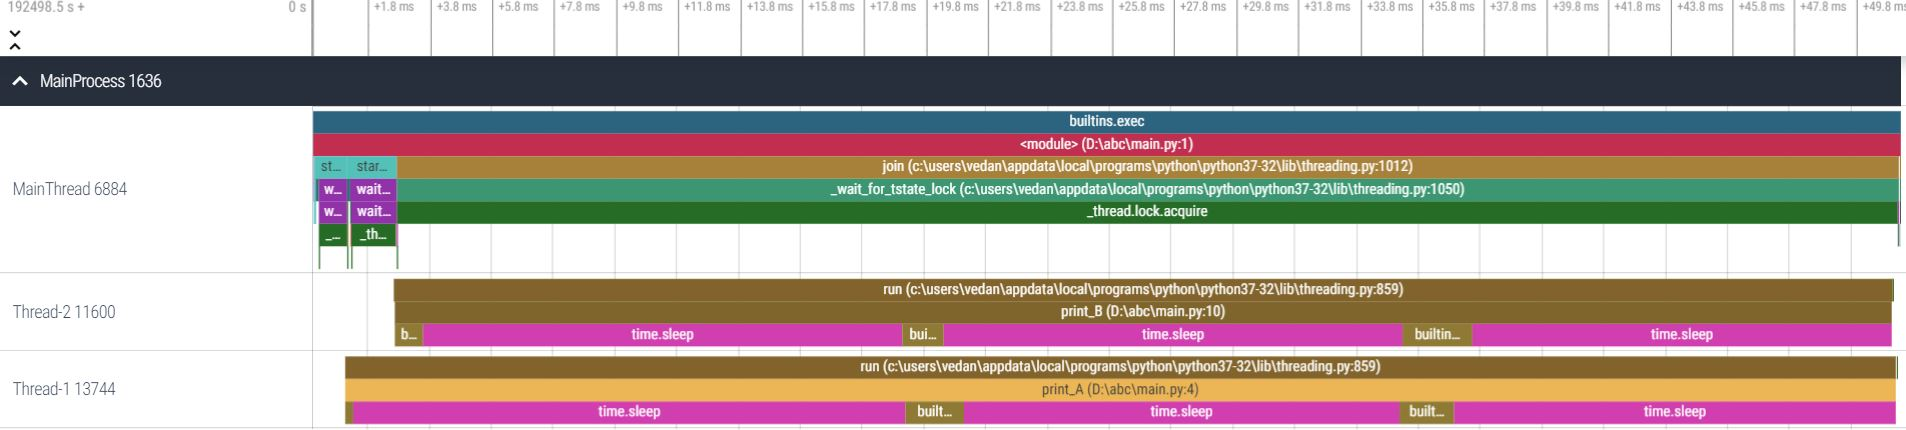

# How can we use threading in Classes
For classes, you have to use inbuilf function 'run' that gets executed when the thread is initialised.

In [36]:
from threading import *
import time

class Sleeper(Thread):
    def run(self):   # inbuilt method for class Thread
        print("Going to sleep for 1 second")
        time.sleep(1)

if __name__ == '__main__':
    start = time.perf_counter()
    threads = []

    for _ in range(10):
        s = Sleeper()
        s.start()
        threads.append(s)

    for t in threads:
        t.join()

    end = time.perf_counter()

    print('Execution Time: ', end-start)

Going to sleep for 1 second
Going to sleep for 1 second
Going to sleep for 1 second
Going to sleep for 1 second
Going to sleep for 1 second
Going to sleep for 1 second
Going to sleep for 1 second
Going to sleep for 1 second
Going to sleep for 1 second
Going to sleep for 1 second
Execution Time:  1.0459238000003097


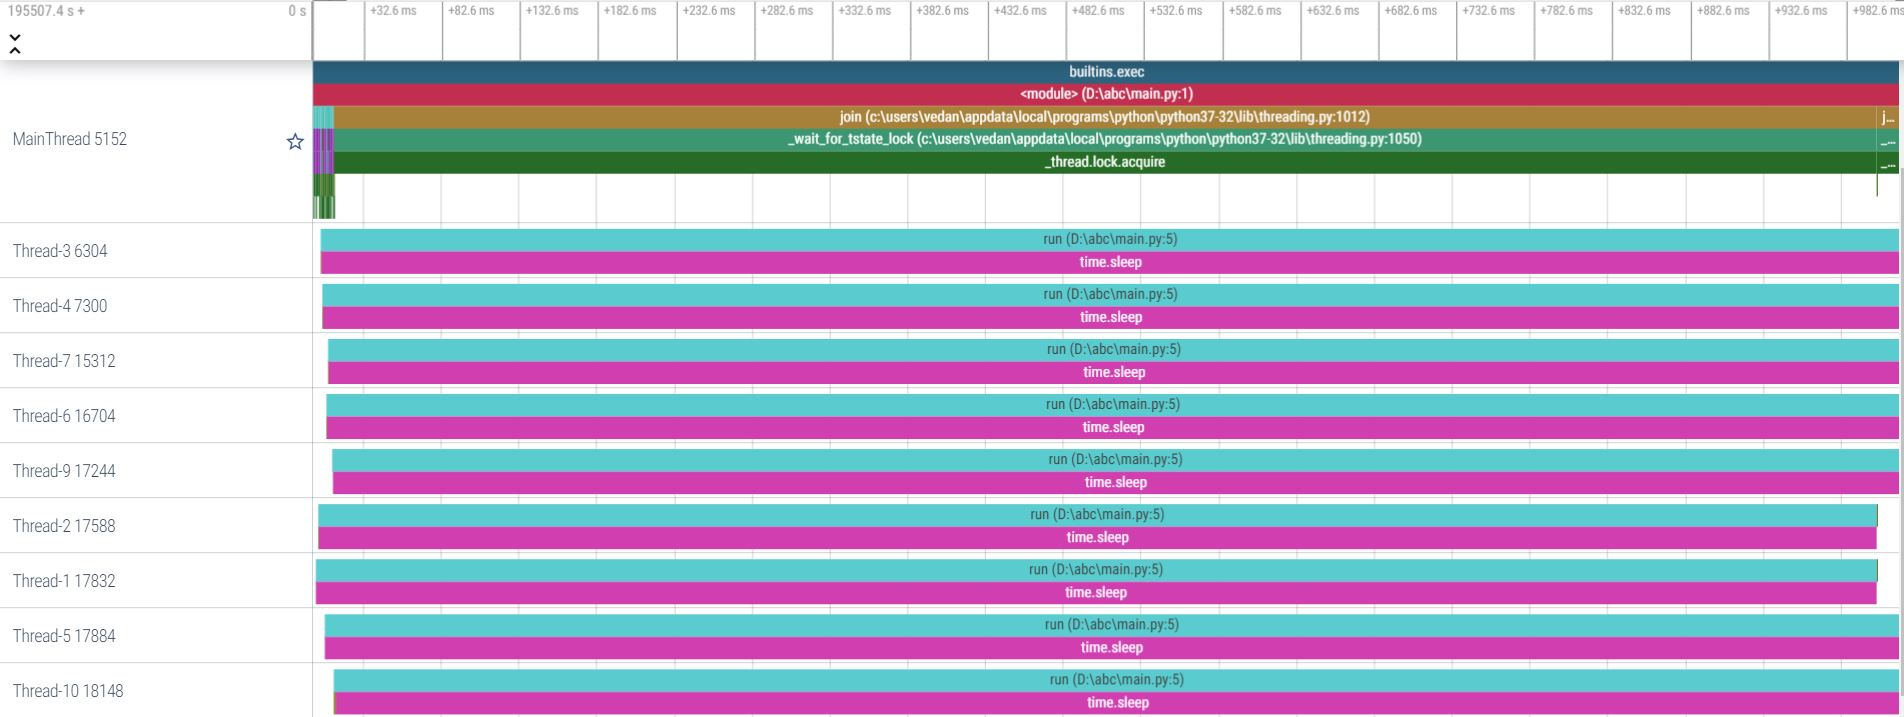

# Is there a More Sophisticated way to code?

The ThreadPoolExecutor class extends the abstract Executor class.

The Executor class defines three methods used to control our thread pool; they are: submit(), map(), and shutdown().

submit(): Dispatch a function to be executed and return a future object.
map(): Apply a function to an iterable of elements.
shutdown(): Shut down the executor.

The Executor is started when the class is created and must be shut down explicitly by calling shutdown(), which will release any resources held by the Executor. We can also shut down automatically, but we will look at that a little later.

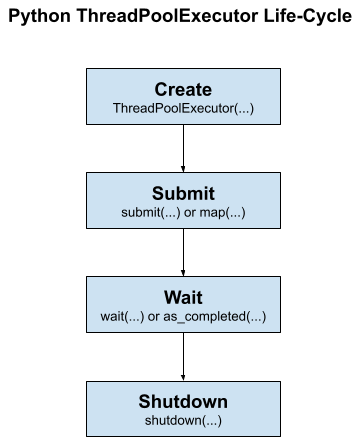

In [7]:
import concurrent.futures
import time

def sleep_function(seconds):
    print(f'Sleeping {seconds} second(s)...')
    time.sleep(seconds)
    return f'Done Sleeping...{seconds}'

if __name__ == '__main__':
    start = time.perf_counter()
    
    with concurrent.futures.ThreadPoolExecutor() as executor:
        secs = [5, 4, 3, 2, 1]
        results = executor.map(sleep_function, secs)

    finish = time.perf_counter()
    
    executor.shutdown()
    print('Execution Time: ', finish-start)

Sleeping 5 second(s)...
Sleeping 4 second(s)...
Sleeping 3 second(s)...
Sleeping 2 second(s)...
Sleeping 1 second(s)...
Execution Time:  5.004786793026142


# Global Interpreter Lock 
A global interpreter lock (GIL) is a mechanism used in Python interpreter to synchronize the execution of threads so that only one native thread can execute at a time, even if run on a multi-core processor.
Protection from Race conditions.

# Real World Example
Grabbing some images from the server in parallel order

In [8]:
import requests
import time
import concurrent.futures

img_urls = [
    'https://images.unsplash.com/photo-1516117172878-fd2c41f4a759',
    'https://images.unsplash.com/photo-1532009324734-20a7a5813719',
    'https://images.unsplash.com/photo-1524429656589-6633a470097c',
    'https://images.unsplash.com/photo-1530224264768-7ff8c1789d79',
    'https://images.unsplash.com/photo-1564135624576-c5c88640f235',
    'https://images.unsplash.com/photo-1541698444083-023c97d3f4b6',
    'https://images.unsplash.com/photo-1522364723953-452d3431c267',
    'https://images.unsplash.com/photo-1513938709626-033611b8cc03',
    'https://images.unsplash.com/photo-1507143550189-fed454f93097',
    'https://images.unsplash.com/photo-1493976040374-85c8e12f0c0e',
    'https://images.unsplash.com/photo-1504198453319-5ce911bafcde',
    'https://images.unsplash.com/photo-1530122037265-a5f1f91d3b99',
    'https://images.unsplash.com/photo-1516972810927-80185027ca84',
    'https://images.unsplash.com/photo-1550439062-609e1531270e',
    'https://images.unsplash.com/photo-1549692520-acc6669e2f0c'
]

t1 = time.perf_counter()


def download_image(img_url):
    img_bytes = requests.get(img_url).content
    img_name = img_url.split('/')[3]
    img_name = f'{img_name}.jpg'
    with open(img_name, 'wb') as img_file:
        img_file.write(img_bytes)
        print(f'{img_name} was downloaded...')

Downloading with a for loop:

In [17]:
start = time.perf_counter()
for image in img_urls:
    download_image(image)
finish = time.perf_counter()
print('Execution Time: ', finish-start)

photo-1516117172878-fd2c41f4a759.jpg was downloaded...
photo-1532009324734-20a7a5813719.jpg was downloaded...
photo-1524429656589-6633a470097c.jpg was downloaded...
photo-1530224264768-7ff8c1789d79.jpg was downloaded...
photo-1564135624576-c5c88640f235.jpg was downloaded...
photo-1541698444083-023c97d3f4b6.jpg was downloaded...
photo-1522364723953-452d3431c267.jpg was downloaded...
photo-1513938709626-033611b8cc03.jpg was downloaded...
photo-1507143550189-fed454f93097.jpg was downloaded...
photo-1493976040374-85c8e12f0c0e.jpg was downloaded...
photo-1504198453319-5ce911bafcde.jpg was downloaded...
photo-1530122037265-a5f1f91d3b99.jpg was downloaded...
photo-1516972810927-80185027ca84.jpg was downloaded...
photo-1550439062-609e1531270e.jpg was downloaded...
photo-1549692520-acc6669e2f0c.jpg was downloaded...
Execution Time:  2.561317388957832


Downloading with Threading:

In [18]:
start = time.perf_counter()
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(download_image, img_urls)
finish = time.perf_counter()
print('Execution Time: ', finish-start)

photo-1516117172878-fd2c41f4a759.jpg was downloaded...
photo-1564135624576-c5c88640f235.jpg was downloaded...
photo-1507143550189-fed454f93097.jpg was downloaded...
photo-1549692520-acc6669e2f0c.jpg was downloaded...
photo-1541698444083-023c97d3f4b6.jpg was downloaded...
photo-1550439062-609e1531270e.jpg was downloaded...
photo-1504198453319-5ce911bafcde.jpg was downloaded...
photo-1530122037265-a5f1f91d3b99.jpg was downloaded...
photo-1516972810927-80185027ca84.jpg was downloaded...
photo-1530224264768-7ff8c1789d79.jpg was downloaded...
photo-1522364723953-452d3431c267.jpg was downloaded...
photo-1513938709626-033611b8cc03.jpg was downloaded...
photo-1532009324734-20a7a5813719.jpg was downloaded...
photo-1524429656589-6633a470097c.jpg was downloaded...
photo-1493976040374-85c8e12f0c0e.jpg was downloaded...
Execution Time:  1.8838800629600883


# Final Note
To decide whether to use Multithreading or Multiprocessing is tough. But usually, if we are dealing with CPU bound tasks i.e. the processes that requires more computation and processing, we usually use Multiprocessers and if we are dealing with I/O bound tasks such as reading/writing files or data extraction, we usually use Multithreading.